# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

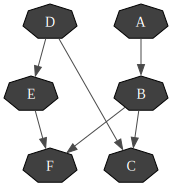

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.781215 , 0.218785] , [0.781214 , 0.218786]]

B:Range([0,1])
<A:0> : [[0.289028 , 0.710972] , [0.286023 , 0.713977]]
<A:1> : [[0.413174 , 0.586826] , [0.412825 , 0.587175]]

C:Range([0,1])
<B:0|D:0> : [[0.204451 , 0.795549] , [0.0852267 , 0.914773]]
<B:1|D:0> : [[0.219238 , 0.780762] , [0.206659 , 0.793341]]
<B:0|D:1> : [[0.240446 , 0.759554] , [0.232617 , 0.767383]]
<B:1|D:1> : [[0.350441 , 0.649559] , [0.349439 , 0.650561]]

D:Range([0,1])
<> : [[0.556782 , 0.443218] , [0.556745 , 0.443255]]

E:Range([0,1])
<D:0> : [[0.938535 , 0.0614647]]
<D:1> : [[0.368889 , 0.631111] , [0.368159 , 0.631841]]

F:Range([0,1])
<E:0|B:0> : [[0.22165 , 0.77835] , [0.0737428 , 0.926257]]
<E:1|B:0> : [[0.220667 , 0.779333] , [0.208507 , 0.791493]]
<E:0|B:1> : [[0.55574 , 0.44426] , [0.555702 , 0.444298]]
<E:1|B:1> : [[0.608442 , 0.391558] , [0.608425 , 0.391575]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()